In [64]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


In [65]:
#File upload
from google.colab import files
files.upload()

Saving data.csv to data (2).csv


{'data (2).csv': b'country,city,district,min_booking_duration,beds,rooms,deposit,area,price,accommodates,number_of_pics,cleaning_fee,first_pic_category,was_published,clicks_count\n1,155,840,2,2,2,2500.0,59.0,1890.0,4,11,100.0,LIVING_ROOM,1,266\n1,155,41,1,4,3,1250.0,75.0,2350.0,4,22,150.0,OUTDOOR_HOUSE,1,133\n2,1086,,1,1,2,3878.0,43.0,3878.0,2,22,150.0,ROOM_BEDROOM,1,17\n1,771,782,3,0,0,0.0,,,,,,,0,0\n1,187,213,1,0,0,0.0,,,,,,,0,0\n1,416,435,1,0,0,0.0,,,,,,,0,0\n1,944,921,1,0,0,0.0,,,,,,,0,0\n2,1086,,6,1,1,2200.0,26.0,1180.0,1,4,0.0,ROOM_BEDROOM,1,104\n1,595,397,5,1,3,4000.0,65.0,2100.0,2,1,250.0,TWO_D_FLOOR_PLAN,1,25\n1,450,469,1,0,0,0.0,,,,,,,0,0\n1,63,72,1,5,4,1000.0,100.0,2500.0,5,9,50.0,DINING_ROOM,1,32\n1,1563,1403,1,0,0,0.0,,,,,,,0,0\n1,155,1068,1,0,0,0.0,,,,,,,0,0\n0,1530,,1,1,1,0.0,40.0,1700.0,2,10,80.0,UNCATEGORIZED,1,5\n1,155,1068,1,0,0,0.0,,,,,,,0,0\n1,450,469,6,1,2,4000.0,57.0,1950.0,2,15,200.0,LIVING_ROOM,1,297\n1,155,314,3,2,3,5580.0,98.0,2890.0,4,14,210.0,LIVING_ROOM,1,

In [66]:
# Load the dataset
df = pd.read_csv('data.csv')


In [67]:
df

,country,city,district,min_booking_duration,beds,rooms,deposit,area,price,accommodates,number_of_pics,cleaning_fee,first_pic_category,was_published,clicks_count
0,1,155,840.0,2,2,2,2500.0,59.0,1890.0,4.0,11.0,100.0,LIVING_ROOM,1,266
1,1,155,41.0,1,4,3,1250.0,75.0,2350.0,4.0,22.0,150.0,OUTDOOR_HOUSE,1,133
2,2,1086,NaN,1,1,2,3878.0,43.0,3878.0,2.0,22.0,150.0,ROOM_BEDROOM,1,17
3,1,771,782.0,3,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1,187,213.0,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16945,1,968,940.0,3,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
16946,0,1530,NaN,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
16947,2,1014,NaN,1,3,4,4000.0,155.0,5690.0,6.0,13.0,150.0,ROOM_BEDROOM,1,0
16948,1,489,512.0,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [68]:
# Basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16950 entries, 0 to 16949
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               16950 non-null  int64  
 1   city                  16950 non-null  int64  
 2   district              14232 non-null  float64
 3   min_booking_duration  16950 non-null  int64  
 4   beds                  16950 non-null  int64  
 5   rooms                 16950 non-null  int64  
 6   deposit               16950 non-null  float64
 7   area                  10553 non-null  float64
 8   price                 10552 non-null  float64
 9   accommodates          10553 non-null  float64
 10  number_of_pics        10554 non-null  float64
 11  cleaning_fee          10552 non-null  float64
 12  first_pic_category    10554 non-null  object 
 13  was_published         16950 non-null  int64  
 14  clicks_count          16950 non-n

## Descriptive stats

In [69]:
# Descriptive statistics of the dataset
print("Descriptive statistics of the dataset:")
print(df.describe())

Descriptive statistics of the dataset:
            country          city      district  min_booking_duration  \
count  16950.000000  16950.000000  14232.000000          16950.000000   
mean       1.102419    633.244248    710.672780              2.047611   
std        0.396917    450.115824    347.781357              2.051789   
min        0.000000      0.000000      0.000000              1.000000   
25%        1.000000    155.000000    435.000000              1.000000   
50%        1.000000    595.000000    764.500000              1.000000   
75%        1.000000   1017.000000    940.000000              3.000000   
max        2.000000   1593.000000   1425.000000             24.000000   

               beds         rooms       deposit          area         price  \
count  16950.000000  16950.000000  16950.000000  10553.000000  10552.000000   
mean       1.259174      1.393923   1321.394867     64.270606   2436.633150   
std        1.510450      1.392240   2199.926204     39.306013   25

#Data Preprocessing

## Dublicates

In [70]:
# Number of duplicate values in the dataset
print("Number of duplicate values in the dataset:")
print(df.duplicated().sum())


Number of duplicate values in the dataset:
5273


In [71]:
# remove duplicates over rows
df.drop_duplicates(inplace=True)


## Rename the 3 columns to columns_Id and change types

In [72]:
# change the column names from "country", "city", and "district" to "country_Id", "city_Id", and "district_Id"
df.rename(columns={'country': 'country_Id', 'city': 'city_Id', 'district': 'district_Id'}, inplace=True)

In [73]:
# Convert the 'country_id' column to categorical data
df['country_Id'] = df['country_Id'].astype('category')

# Convert the 'city_id' column to categorical data
df['city_Id'] = df['city_Id'].astype('category')

# Convert the 'district_id' column to categorical data
df['district_Id'] = df['district_Id'].astype('category')

In [74]:
null_counts = df[['country_Id', 'city_Id', 'district_Id']].isnull().sum()
print(null_counts)

country_Id        0
city_Id           0
district_Id    2318
dtype: int64


In [75]:
total_count = len(df)  # Total count of rows
null_count = df['district_Id'].isnull().sum()  # Count of null values in 'district_Id'

null_percentage = (null_count / total_count) * 100  # Calculate the percentage

print(f"Percentage of null values in 'district_Id': {null_percentage:.2f}%")

Percentage of null values in 'district_Id': 19.85%


## Impute null values at District_ID




In [76]:
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed

In [77]:
df['district_Id'] = imputer.fit_transform(df[['district_Id']])

In [78]:
# Convert the 'district_id' column to categorical data
df['district_Id'] = df['district_Id'].astype('category')

## Convert the numerical columns type and fill null

In [79]:
cols_to_convert = ["min_booking_duration", "beds", "rooms","deposit","area","price","accommodates","number_of_pics","cleaning_fee","was_published","clicks_count"]
df[cols_to_convert] = df[cols_to_convert].fillna(0).astype(int)


In [80]:
# Calculate missing values percentage for each column
missing_percentage = df[cols_to_convert].isnull().mean() * 100

# Print the missing values percentage for each column
for column, percentage in missing_percentage.items():
    print(f"{column}: {percentage:.2f}%")


min_booking_duration: 0.00%
beds: 0.00%
rooms: 0.00%
deposit: 0.00%
area: 0.00%
price: 0.00%
accommodates: 0.00%
number_of_pics: 0.00%
cleaning_fee: 0.00%
was_published: 0.00%
clicks_count: 0.00%


In [81]:
# Basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11677 entries, 0 to 16949
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country_Id            11677 non-null  category
 1   city_Id               11677 non-null  category
 2   district_Id           11677 non-null  category
 3   min_booking_duration  11677 non-null  int64   
 4   beds                  11677 non-null  int64   
 5   rooms                 11677 non-null  int64   
 6   deposit               11677 non-null  int64   
 7   area                  11677 non-null  int64   
 8   price                 11677 non-null  int64   
 9   accommodates          11677 non-null  int64   
 10  number_of_pics        11677 non-null  int64   
 11  cleaning_fee          11677 non-null  int64   
 12  first_pic_category    10527 non-null  object  
 13  was_published         11677 non-null  int64   
 14  clicks_count     

In [82]:
df

,country_Id,city_Id,district_Id,min_booking_duration,beds,rooms,deposit,area,price,accommodates,number_of_pics,cleaning_fee,first_pic_category,was_published,clicks_count
0,1,155,840.000000,2,2,2,2500,59,1890,4,11,100,LIVING_ROOM,1,266
1,1,155,41.000000,1,4,3,1250,75,2350,4,22,150,OUTDOOR_HOUSE,1,133
2,2,1086,711.594081,1,1,2,3878,43,3878,2,22,150,ROOM_BEDROOM,1,17
3,1,771,782.000000,3,0,0,0,0,0,0,0,0,NaN,0,0
4,1,187,213.000000,1,0,0,0,0,0,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,2,1086,711.594081,1,2,2,400,80,21833,4,13,85,ROOM_BEDROOM,1,2
16942,1,155,1049.000000,3,2,3,2000,61,1800,2,12,0,UNCATEGORIZED,1,155
16944,2,1352,711.594081,1,2,2,300,42,3684,2,25,200,UNCATEGORIZED,1,0
16947,2,1014,711.594081,1,3,4,4000,155,5690,6,13,150,ROOM_BEDROOM,1,0


## Outliers

In [83]:
# Calculate the percentage of outliers for each column
outlier_percentage = {}

for column in cols_to_convert:
    # Calculate z-scores for each value in the column
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
    threshold = 3

    # Count the number of outliers
    num_outliers = np.sum(np.abs(z_scores) > threshold)

    # Calculate the percentage of outliers
    percentage = (num_outliers / len(df)) * 100

    # Store the percentage of outliers for the column
    outlier_percentage[column] = percentage

# Print the percentage of outliers for each column
for column, percentage in outlier_percentage.items():
    print(f"{column}: {percentage:.2f}%")

min_booking_duration: 2.22%
beds: 1.56%
rooms: 0.98%
deposit: 1.10%
area: 1.12%
price: 1.31%
accommodates: 2.12%
number_of_pics: 1.29%
cleaning_fee: 0.39%
was_published: 0.00%
clicks_count: 1.79%


##**I split the the columns to High and low percentage of outliers**
- High percentage ->> using log transformation to reduce the impact of outliers while retaining the data points

- Low percentage ->> using robust machine learning models


In [84]:
# Columns to transform
cols_to_transform = ["min_booking_duration", "accommodates"]

# Apply log transformation
for col in cols_to_transform:
    df[col] = np.log1p(df[col])

In [85]:
# Define the columns with outliers
columns_with_outliers = ["beds", "rooms", "deposit", "area", "number_of_pics", "cleaning_fee", "clicks_count"]

# Step 1: Log Transformation to Reduce Skewness (Deal with Outliers)
for column in columns_with_outliers:
    df[column] = np.log1p(df[column])

# Step 2: Identify Outliers using Z-Score and Remove Them
threshold = 3  # Define a threshold for outliers (e.g., z-score > 3 or z-score < -3)

for column in columns_with_outliers:
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Filter the DataFrame to keep only non-outliers
    df = df[np.abs(z_scores) <= threshold]

# # If you need to use these columns for modeling or analysis, you may need to apply an inverse transformation.
# # For example, you can use np.expm1() to reverse the log transformation.

# # Define the target column
# target_column = "price"

# Define your feature columns
features = ["min_booking_duration", "beds", "rooms", "deposit", "area", "accommodates", "number_of_pics", "cleaning_fee", "clicks_count"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=42)

# # Step 4: Create and Train a Random Forest Model (or another model of your choice) on the modified data
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

# # Step 5: Make Predictions on the Test Set
# y_pred = rf_model.predict(X_test)


In [86]:
df[columns_with_outliers] = df[columns_with_outliers]  # Replace columns with outliers
df[features] = df[features]  # Replace other feature columns

In [87]:
df

,country_Id,city_Id,district_Id,min_booking_duration,beds,rooms,deposit,area,price,accommodates,number_of_pics,cleaning_fee,first_pic_category,was_published,clicks_count
0,1,155,840.000000,1.098612,1.098612,1.098612,7.824446,4.094345,1890,1.609438,2.484907,4.615121,LIVING_ROOM,1,5.587249
1,1,155,41.000000,0.693147,1.609438,1.386294,7.131699,4.330733,2350,1.609438,3.135494,5.017280,OUTDOOR_HOUSE,1,4.897840
2,2,1086,711.594081,0.693147,0.693147,1.098612,8.263333,3.784190,3878,1.098612,3.135494,5.017280,ROOM_BEDROOM,1,2.890372
3,1,771,782.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,NaN,0,0.000000
4,1,187,213.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,2,1086,711.594081,0.693147,1.098612,1.098612,5.993961,4.394449,21833,1.609438,2.639057,4.454347,ROOM_BEDROOM,1,1.098612
16942,1,155,1049.000000,1.386294,1.098612,1.386294,7.601402,4.127134,1800,1.098612,2.564949,0.000000,UNCATEGORIZED,1,5.049856
16944,2,1352,711.594081,0.693147,1.098612,1.098612,5.707110,3.761200,3684,1.098612,3.258097,5.303305,UNCATEGORIZED,1,0.000000
16947,2,1014,711.594081,0.693147,1.386294,1.609438,8.294300,5.049856,5690,1.945910,2.639057,5.017280,ROOM_BEDROOM,1,0.000000


## *Missing values with categorical column*

In [88]:
total_count = len(df)  # Total count of rows
missing_count = df['first_pic_category'].isnull().sum()  # Count of missing values in 'first_pic_category'

missing_percentage = (missing_count / total_count) * 100  # Calculate the percentage

print(f"Percentage of missing values in 'first_pic_category': {missing_percentage:.2f}%")

Percentage of missing values in 'first_pic_category': 9.88%


In [89]:
mode = df['first_pic_category'].mode()[0]
df['first_pic_category'].fillna(mode, inplace=True)

In [90]:
cols_to_convert = ["min_booking_duration", "beds", "rooms","deposit","area","price","accommodates","number_of_pics","cleaning_fee","was_published","clicks_count"]
df[cols_to_convert] = df[cols_to_convert].fillna(0).astype(int)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11644 entries, 0 to 16949
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country_Id            11644 non-null  category
 1   city_Id               11644 non-null  category
 2   district_Id           11644 non-null  category
 3   min_booking_duration  11644 non-null  int64   
 4   beds                  11644 non-null  int64   
 5   rooms                 11644 non-null  int64   
 6   deposit               11644 non-null  int64   
 7   area                  11644 non-null  int64   
 8   price                 11644 non-null  int64   
 9   accommodates          11644 non-null  int64   
 10  number_of_pics        11644 non-null  int64   
 11  cleaning_fee          11644 non-null  int64   
 12  first_pic_category    11644 non-null  object  
 13  was_published         11644 non-null  int64   
 14  clicks_count          11644 non-null  int64   
dtypes:

Numerical columns corrleation with **Price**



#**EDA**

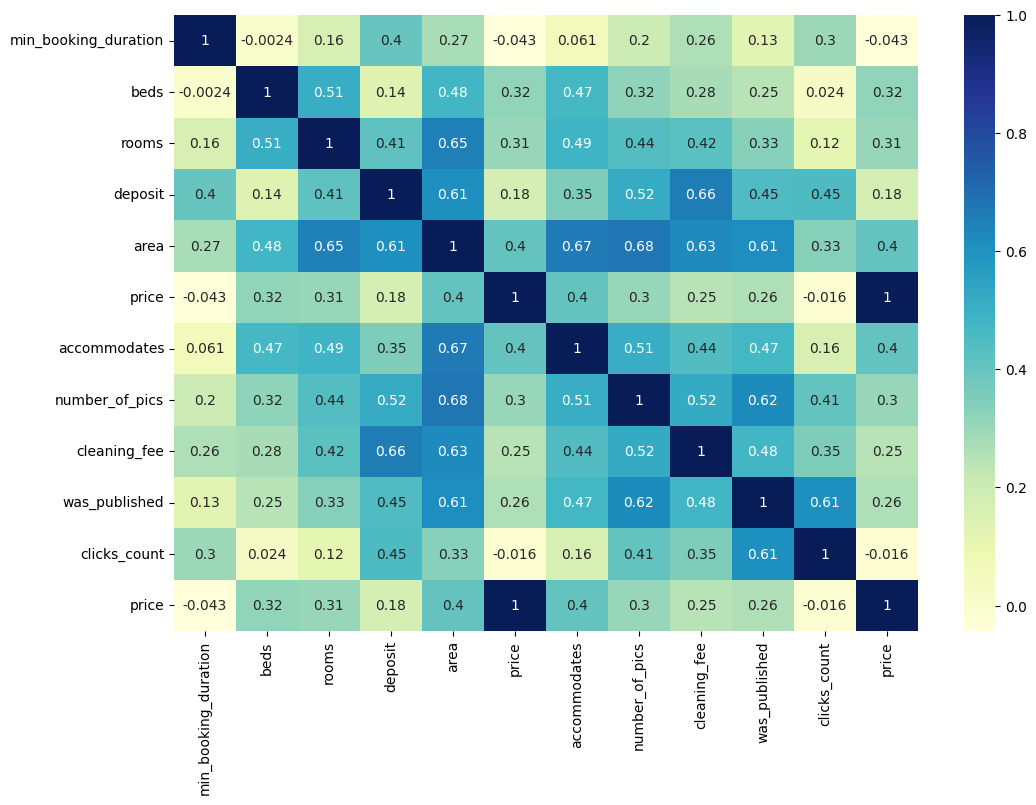

In [92]:
plt.figure(figsize=(12, 8))  # Specify width and height in inches
# Correlation matrix and heatmap
correlation_matrix = df[cols_to_convert + ["price"]].corr()

sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

##Numerical column corrleation with **Price**


<Figure size 1000x600 with 0 Axes>

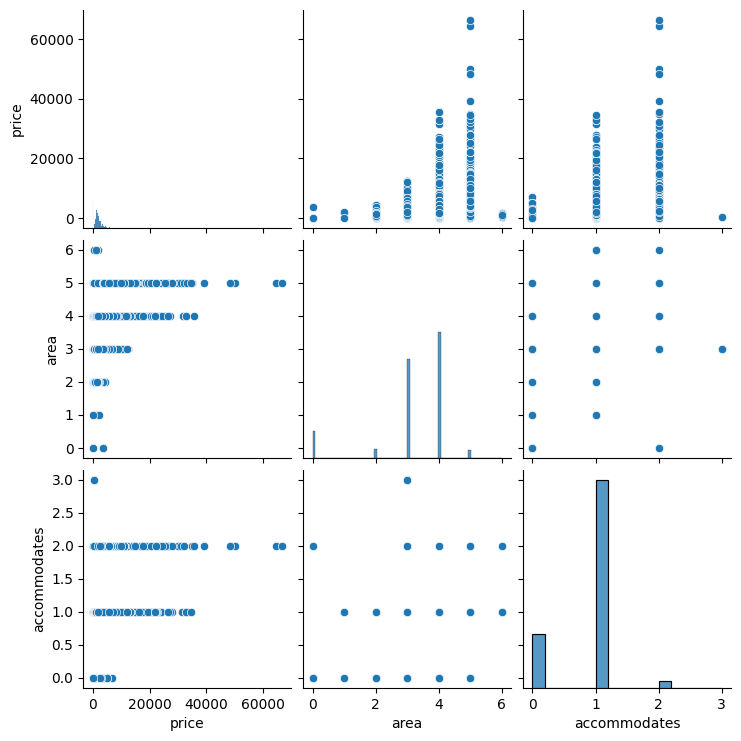

In [93]:
plt.figure(figsize=(10, 6))  # Specify width and height in inches
# Pairwise scatter plots for numerical columns
sns.pairplot(data=df, vars=['price', 'area', 'accommodates'])


In [94]:
df

,country_Id,city_Id,district_Id,min_booking_duration,beds,rooms,deposit,area,price,accommodates,number_of_pics,cleaning_fee,first_pic_category,was_published,clicks_count
0,1,155,840.000000,1,1,1,7,4,1890,1,2,4,LIVING_ROOM,1,5
1,1,155,41.000000,0,1,1,7,4,2350,1,3,5,OUTDOOR_HOUSE,1,4
2,2,1086,711.594081,0,0,1,8,3,3878,1,3,5,ROOM_BEDROOM,1,2
3,1,771,782.000000,1,0,0,0,0,0,0,0,0,ROOM_BEDROOM,0,0
4,1,187,213.000000,0,0,0,0,0,0,0,0,0,ROOM_BEDROOM,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,2,1086,711.594081,0,1,1,5,4,21833,1,2,4,ROOM_BEDROOM,1,1
16942,1,155,1049.000000,1,1,1,7,4,1800,1,2,0,UNCATEGORIZED,1,5
16944,2,1352,711.594081,0,1,1,5,3,3684,1,3,5,UNCATEGORIZED,1,0
16947,2,1014,711.594081,0,1,1,8,5,5690,1,2,5,ROOM_BEDROOM,1,0


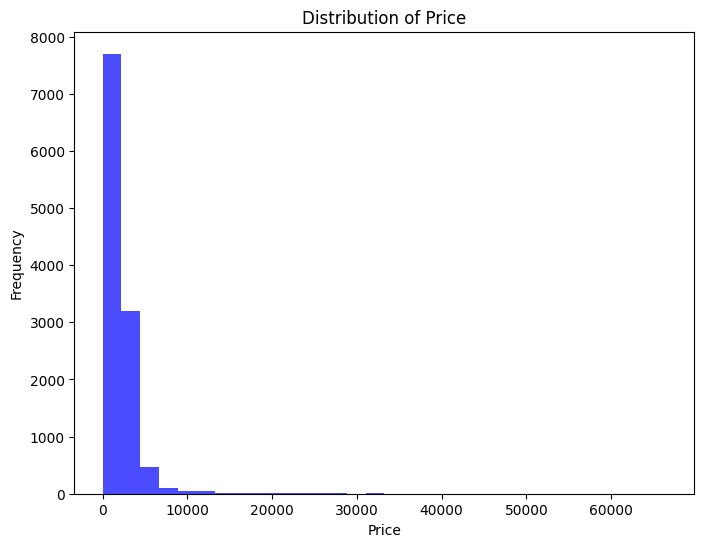

In [95]:
# Plot a histogram of the 'price' column
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

#Features enginnering




In [96]:
# Log transformation for skewed data
df['price'] = np.log1p(df['price'])  # Log-transform the target variable

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['first_pic_category'], prefix='pic_category', drop_first=True)


In [97]:
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

In [98]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection

In [100]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest
# Feature selection using SelectKBest with ANOVA F-test (or other methods)
selector = SelectKBest(score_func=f_regression, k='all')  # Use 'all' to select all features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the names of the selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['country_Id', 'city_Id', 'district_Id', 'min_booking_duration', 'beds',
       'rooms', 'deposit', 'area', 'accommodates', 'number_of_pics',
       'cleaning_fee', 'was_published', 'clicks_count',
       'pic_category_BATHROOM', 'pic_category_CELLAR', 'pic_category_DETAILS',
       'pic_category_DINING_ROOM', 'pic_category_DOCUMENTS',
       'pic_category_EMPTY_ROOM', 'pic_category_GARDEN', 'pic_category_GYM',
       'pic_category_HALL_CORRIDOR', 'pic_category_KITCHEN',
       'pic_category_LAUNDRY_ROOM', 'pic_category_LIVING_DINING_ROOM',
       'pic_category_LIVING_ROOM', 'pic_category_MAP_LOCATION',
       'pic_category_MOUNTAIN_VIEW', 'pic_category_NON_RELATED',
       'pic_category_OFFICE', 'pic_category_OUTDOOR_BUILDING',
       'pic_category_OUTDOOR_HOUSE', 'pic_category_PARKING',
       'pic_category_POOL', 'pic_category_RECEPTION_LOBBY',
       'pic_category_ROOM_BEDROOM', 'pic_category_STAIRS',
       'pic_category_STORAGE_PANTRY', 'pic_category_TERR

#Modeling and Evaluation

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a dictionary of models with hyperparameters to search
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
}

# Define hyperparameters to search for Ridge (alpha parameter for regularization)
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0]}

# Initialize Ridge Regression with default alpha (it will be tuned)
ridge = Ridge()

# Loop through the models and perform hyperparameter tuning and evaluation
for model_name, model in models.items():
    if model_name == "Ridge Regression":
        # Perform hyperparameter tuning for Ridge
        grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model

    # Train the best model
    best_model.fit(X_train_selected, y_train)

    # Make predictions on the training set and test set
    y_train_pred = best_model.predict(X_train_selected)
    y_test_pred = best_model.predict(X_test_selected)

    # Calculate evaluation metrics for the training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"Model: {model_name}")
    print("Training Set:")
    print(f"   MSE: {train_mse:.2f}")
    print(f"   MAE: {train_mae:.2f}")
    print(f"   R^2: {train_r2:.2f}")
    print("Test Set:")
    print(f"   MSE: {test_mse:.2f}")
    print(f"   MAE: {test_mae:.2f}")
    print(f"   R^2: {test_r2:.2f}")
    print("-" * 50)


Model: Linear Regression
Training Set:
   MSE: 0.59
   MAE: 0.61
   R^2: 0.89
Test Set:
   MSE: 0.60
   MAE: 0.60
   R^2: 0.89
--------------------------------------------------
Model: Decision Tree
Training Set:
   MSE: 0.00
   MAE: 0.01
   R^2: 1.00
Test Set:
   MSE: 0.27
   MAE: 0.28
   R^2: 0.95
--------------------------------------------------
Model: Random Forest
Training Set:
   MSE: 0.02
   MAE: 0.08
   R^2: 1.00
Test Set:
   MSE: 0.17
   MAE: 0.22
   R^2: 0.97
--------------------------------------------------
Model: Gradient Boosting
Training Set:
   MSE: 0.12
   MAE: 0.22
   R^2: 0.98
Test Set:
   MSE: 0.18
   MAE: 0.24
   R^2: 0.97
--------------------------------------------------
Model: Support Vector Regression
Training Set:
   MSE: 0.14
   MAE: 0.23
   R^2: 0.97
Test Set:
   MSE: 0.19
   MAE: 0.25
   R^2: 0.97
--------------------------------------------------


In [102]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model with a maximum depth
# You can adjust max_depth to control overfitting (e.g., max_depth=5)
decision_tree_model = DecisionTreeRegressor(max_depth=5)

# Train the model
decision_tree_model.fit(X_train_selected, y_train)

# Evaluate the model
y_train_pred = decision_tree_model.predict(X_train_selected)
y_test_pred = decision_tree_model.predict(X_test_selected)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Decision Tree with Regularization (Pruning)")
print("Training Set:")
print(f"   MSE: {train_mse:.2f}")
print(f"   MAE: {train_mae:.2f}")
print(f"   R^2: {train_r2:.2f}")
print("Test Set:")
print(f"   MSE: {test_mse:.2f}")
print(f"   MAE: {test_mae:.2f}")
print(f"   R^2: {test_r2:.2f}")


Decision Tree with Regularization (Pruning)
Training Set:
   MSE: 0.19
   MAE: 0.29
   R^2: 0.97
Test Set:
   MSE: 0.24
   MAE: 0.29
   R^2: 0.96


In [103]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with regularization parameters
# You can adjust n_estimators and max_depth to control overfitting
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Train the model
random_forest_model.fit(X_train_selected, y_train)

# Evaluate the model
y_train_pred = random_forest_model.predict(X_train_selected)
y_test_pred = random_forest_model.predict(X_test_selected)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Random Forest with Regularization")
print("Training Set:")
print(f"   MSE: {train_mse:.2f}")
print(f"   MAE: {train_mae:.2f}")
print(f"   R^2: {train_r2:.2f}")
print("Test Set:")
print(f"   MSE: {test_mse:.2f}")
print(f"   MAE: {test_mae:.2f}")
print(f"   R^2: {test_r2:.2f}")


Random Forest with Regularization
Training Set:
   MSE: 0.17
   MAE: 0.27
   R^2: 0.97
Test Set:
   MSE: 0.22
   MAE: 0.28
   R^2: 0.96
